# Clustering National Home Markets

You work for a large national bank, who has a large lending business devoted toward providing loans to people who want to borrow to buy homes across the United States. The bank wants to have a model which can identify how similar, at any given time, the national real estate market is to other real estate periods which have occured in the past. After all, quantifying the nature of today's real estate market to those that have occured in the past will help the bank understand its lending risk, as well as the potential for new growth.

To that effect, you've decided to use the `KMeans` unsupervised learning algorithm to segment different periods in the U.S. market for national residential house prices.

In [1]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans

## Read in the `national-home-sales.csv` file from the Resources folder and create a DataFrame. Set the “date” column to create the DatetimeIndex. Be sure to include parameters for `parse_dates` and `infer_datetime_format`.

In [2]:
# Read in the CSV file as a Pandas DataFrame
home_sales_df = pd.read_csv(
  Path("../Resources/national-home-sales.csv"),
  index_col="date", 
  parse_dates=True, 
  infer_datetime_format=True 
)

# Review the DataFrame
home_sales_df.head()

C:\Users\ppate\AppData\Local\Temp\ipykernel_21712\1667773510.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  home_sales_df = pd.read_csv(
C:\Users\ppate\AppData\Local\Temp\ipykernel_21712\1667773510.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  home_sales_df = pd.read_csv(


,inventory,homes_sold,median_sale_price
date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000


## Create two lists: one to hold the list of inertia scores and another for the range of k values (from 1 to 11) to analyze.

In [3]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1,11))

## Using a for-loop to evaluate each instance of k, define a K-means model, fit the K-means model based on the scaled DataFrame, and append the model’s inertia to the empty inertia list that you created in the previous step.

In [4]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance

for i in k:
    k_model = KMeans(n_clusters = i, random_state = 1)
    k_model.fit(home_sales_df)
    inertia.append(k_model.inertia_)

C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

## Store the values for k and the inertia in a Dictionary called `elbow_data`. Use `elbow_data` to create a Pandas DataFrame called `df_elbow`.

In [5]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k" : k, "inertia" : inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,8.048111e+12
1,2,3.460149e+12
2,3,1.894158e+12
3,4,1.356238e+12
4,5,1.121825e+12
5,6,8.976133e+11
6,7,7.718409e+11
7,8,6.546527e+11
8,9,5.836318e+11
9,10,4.583101e+11


## Using hvPlot, plot the `df_elbow` DataFrame to visualize the elbow curve.

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

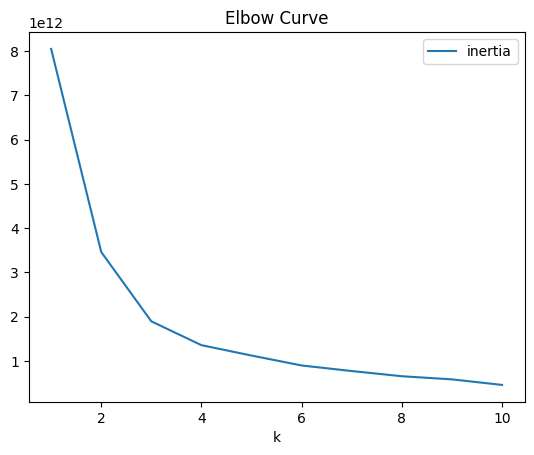

In [9]:
# Plot the DataFrame
df_elbow.plot(
    title = "Elbow Curve", 
    x = "k", 
    y = "inertia")

## Perform the following tasks for each of the two most likely values of `k`:

* Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to a copy of the scaled DataFrame and call it `spread_predictions_df`.

* Plot the clusters. The x-axis should reflect home "inventory", and the y-axis should reflect either the "median_sale_price" or "homes_sold" variable.

In [11]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters = 3, random_state = 1)

# Fit the model
model.fit(home_sales_df)

# Make predictions
k_lower = model.predict(home_sales_df)

# Create a copy of the DataFrame and name it as spread_df_predictions
home_sales_predictions_df = home_sales_df.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
home_sales_predictions_df['clusters_lower'] = k_lower

C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
# Review dataframe
home_sales_predictions_df

,inventory,homes_sold,median_sale_price,clusters_lower
date,,,,
2020-01-01,1250798,377964,289000,1
2020-02-01,1265253,405992,294000,1
2020-03-01,1316823,507324,303000,1
2020-04-01,1297460,436855,304000,1
2020-05-01,1289500,421351,299000,1
...,...,...,...,...
2019-08-01,1660309,627929,296000,0
2019-09-01,1651469,532688,292000,0
2019-10-01,1598498,543858,293000,0


KeyError: 'inventory'

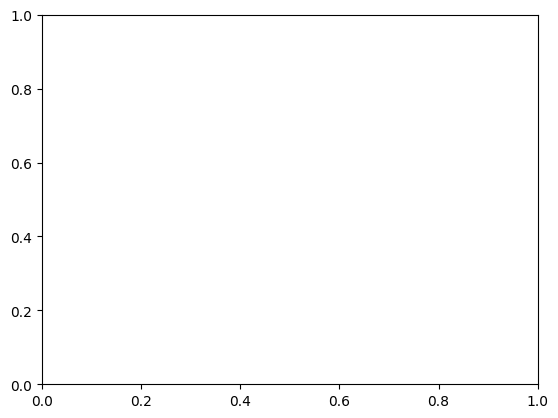

In [16]:
# Plot the clusters
home_sales_predictions_df.plot.scatter(
    x = "inventory",
    y = "median_sale_price",
    by = "clusters_lower", 
    xticks = k)

In [17]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters = 4, random_state = 1)

# Fit the model
model.fit(home_sales_df)

# Make predictions
k_higher = model.predict(home_sales_df)

# Add a class column with the labels to the spread_df_predictions DataFrame
home_sales_predictions_df['clusters_higher'] = k_higher

C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'inventory'

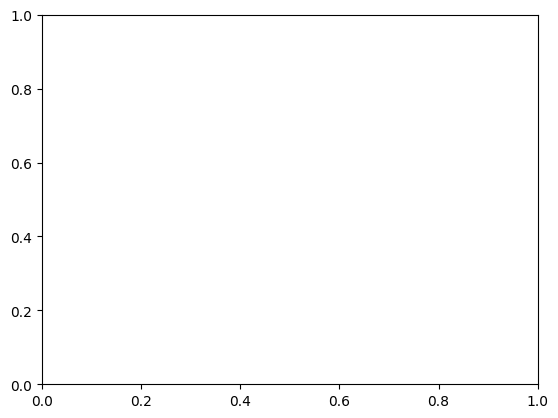

In [20]:
# Plot the clusters
home_sales_predictions_df.plot.scatter(
    x = "inventory", 
    y = "homes_sold",
    by = "clusters_higher")

## Answer the following question

* Considering the plot, what’s the best number of clusters to choose, or value of k? 
    >* Your Answer Here